In [55]:
# Usual Libraries
import pandas as pd
import numpy as np
from numpy import percentile
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [56]:
data_music=pd.read_excel(r'C:\Users\Hazshots\Desktop\Feature_extraction_30.xls')

In [57]:
data_music.head()

,filename,label,fsc_mean,fsc_var,fsb_mean,fsb_var,chroma_mean,chroma_var,rms_mean,rms_var,...,mfcc_mean21,mfcc_mean22,mfcc_mean23,mfcc_mean24,mfcc_mean25,mfcc_mean26,mfcc_mean27,mfcc_mean28,mfcc_mean29,mfcc_mean30
0,blues.00000.wav,blues,1784.165850,129774.064525,2002.449060,85882.761315,0.362313,0.106962,0.130228,0.002827,...,-3.534350,-1.141433,-4.283032,-4.226195,0.915617,0.912687,-5.761347,-3.932743,1.510824,2.698882
1,blues.00001.wav,blues,1530.176679,375850.073649,2039.036516,213843.755497,0.460052,0.142584,0.095948,0.002373,...,-4.095796,-1.239113,-2.849731,-4.350280,3.272610,1.219840,-0.011623,-0.068070,3.977461,-0.455880
2,blues.00002.wav,blues,1552.811865,156467.643368,1747.702312,76254.192257,0.273189,0.044912,0.175570,0.002746,...,-4.050981,-0.572249,-2.018496,-5.387675,-5.137322,-7.807413,-1.173293,-0.211240,1.391639,-3.002489
3,blues.00003.wav,blues,1070.106615,184355.942417,1596.412872,166441.494769,0.341006,0.062565,0.141093,0.006346,...,-1.497070,-0.052236,-1.860378,-4.708420,-3.922396,-6.646778,-2.896451,-3.225220,-0.269411,-3.817974
4,blues.00004.wav,blues,1835.004266,343399.939274,1748.172116,88445.209036,0.192628,0.038132,0.091529,0.002303,...,-5.864221,-0.721730,0.956659,-1.220395,4.582734,0.304413,-1.278633,-4.487785,-0.413578,0.281198


In [58]:
data_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   filename              999 non-null    object 
 1   label                 999 non-null    object 
 2   fsc_mean              999 non-null    float64
 3   fsc_var               999 non-null    float64
 4   fsb_mean              999 non-null    float64
 5   fsb_var               999 non-null    float64
 6   chroma_mean           999 non-null    float64
 7   chroma_var            999 non-null    float64
 8   rms_mean              999 non-null    float64
 9   rms_var               999 non-null    float64
 10  rolloff_mean          999 non-null    float64
 11  rolloff_var           999 non-null    float64
 12  zero_cross_rate_mean  999 non-null    float64
 13  zero_cross_rate_var   999 non-null    float64
 14  mel_spect_mean        999 non-null    float64
 15  mel_spect_var         9

Text(0, 0.5, 'BPM')

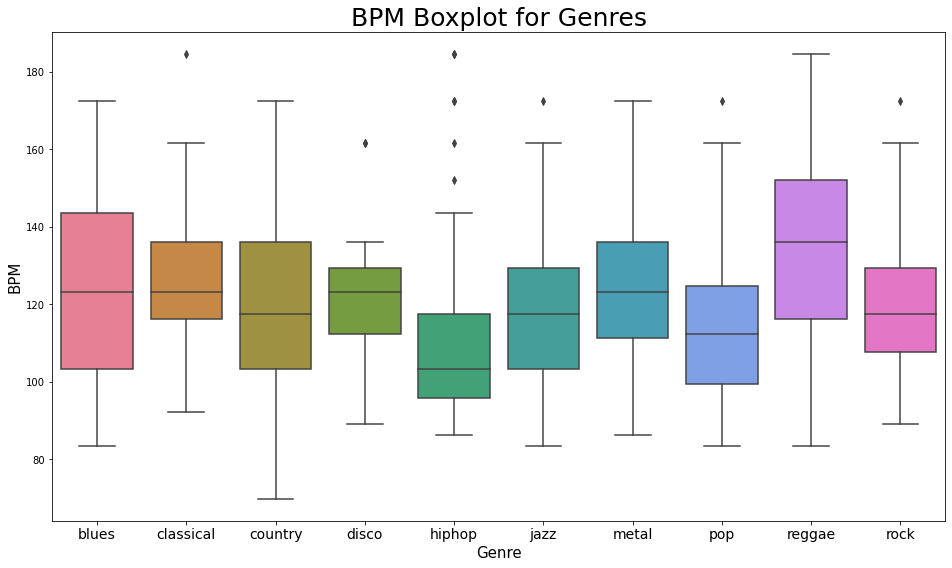

In [60]:
x=data_music[["label","tempo"]]  #It gave a key error when I assign it to train test
f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

In [61]:
X = data_music.iloc[:,2:]
y = data_music["label"]

In [62]:
X.shape,y.shape

((999, 83), (999,))

In [63]:
### Splitting using train_test_split method
# Splitting into temp(train+valid) and test sets
temp_set, test_set, temp_labels, test_labels = train_test_split(X, y,test_size=0.2, random_state=8)
#Splitting the temp into train and valid sets
train_set, valid_set, train_labels, valid_labels = train_test_split(temp_set, temp_labels,test_size=0.3, random_state=8)

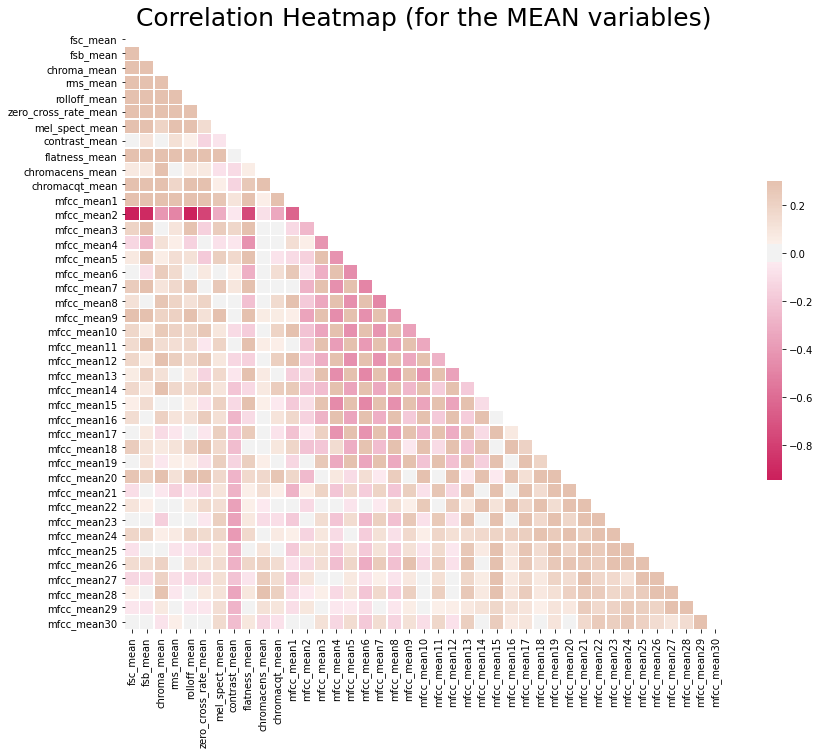

In [10]:
# Computing the Correlation Matrix
spike_cols = [col for col in data_music.columns if 'mean' in col]
corr = train_set[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);


# Deep Learning:

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import PIL
import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, MobileNetV2, InceptionV3
from tensorflow.keras.optimizers import Adam

In [28]:
img_data = r"C:\Users\HazShots\Desktop\Data\images_original"

In [29]:
BATCH_SIZE=8
TARGET_SIZE=224 # Based on EfficientNetB0
NUM_CLASSES=10

In [30]:
train_ds = image_dataset_from_directory(
  img_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(TARGET_SIZE, TARGET_SIZE),
  batch_size=BATCH_SIZE)

Found 999 files belonging to 10 classes.
Using 800 files for training.


In [31]:
val_ds = image_dataset_from_directory(
  img_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(TARGET_SIZE, TARGET_SIZE),
  batch_size=BATCH_SIZE)

Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [32]:
class_names = train_ds.class_names
print(class_names)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


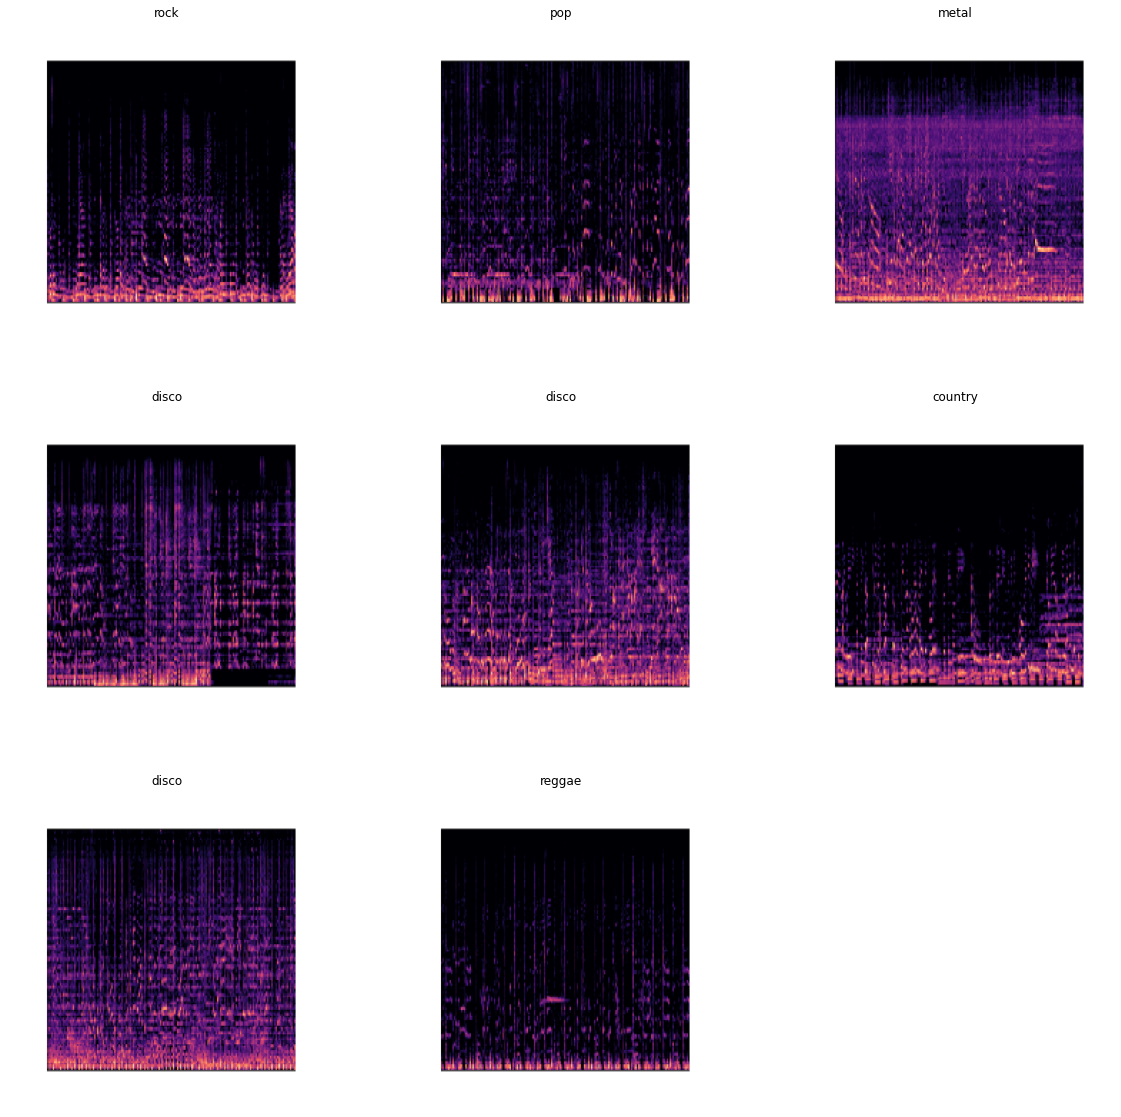

In [33]:
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Helper Functions

In [34]:
model_save = tf.keras.callbacks.ModelCheckpoint('./best_weights.h5', 
                             save_best_only = True, 
                             save_weights_only = True,
                             monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0.001, 
                           patience = 10, mode = 'min', verbose = 1,
                           restore_best_weights = True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'min', verbose = 1)

In [35]:
def plot_hist(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid()
    plt.show()

# MODELING

In [36]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

In [37]:
model.compile(optimizer=Adam(lr = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [39]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30
100/100 - 176s - loss: 2.2984 - accuracy: 0.1863 - val_loss: 2.0225 - val_accuracy: 0.2462

Epoch 00001: val_loss improved from inf to 2.02253, saving model to .\best_weights.h5
Epoch 2/30
100/100 - 53s - loss: 1.7101 - accuracy: 0.4187 - val_loss: 1.5601 - val_accuracy: 0.4422

Epoch 00002: val_loss improved from 2.02253 to 1.56007, saving model to .\best_weights.h5
Epoch 3/30
100/100 - 42s - loss: 1.2816 - accuracy: 0.5688 - val_loss: 1.4972 - val_accuracy: 0.4221

Epoch 00003: val_loss improved from 1.56007 to 1.49723, saving model to .\best_weights.h5
Epoch 4/30
100/100 - 41s - loss: 0.9077 - accuracy: 0.7000 - val_loss: 1.4167 - val_accuracy: 0.4824

Epoch 00004: val_loss improved from 1.49723 to 1.41672, saving model to .\best_weights.h5
Epoch 5/30
100/100 - 41s - loss: 0.5851 - accuracy: 0.8112 - val_loss: 1.6590 - val_accuracy: 0.5025

Epoch 00005: val_loss did not improve from 1.41672
Epoch 6/30
100/100 - 41s - loss: 0.3122 - accuracy: 0.8988 - val_loss: 1.7491 - va

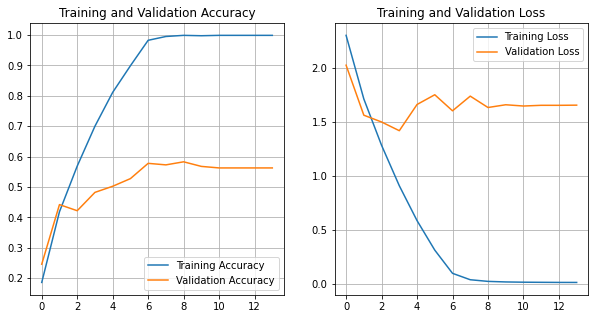

In [40]:
plot_hist(history)

# EfficientNet train from scratch

In [97]:
def create_model():
    conv_base = EfficientNetB0(include_top = False, weights = None,
                               input_shape = (TARGET_SIZE, TARGET_SIZE, 3))
    model = conv_base.output
    model = layers.GlobalAveragePooling2D()(model)
    model = layers.Dense(NUM_CLASSES, activation = "softmax")(model)
    model = models.Model(conv_base.input, model)

    model.compile(optimizer = Adam(lr = 0.001),
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"])
    return model
model = create_model()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_4 (Rescaling)         (None, 224, 224, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
normalization_3 (Normalization) (None, 224, 224, 3)  7           rescaling_4[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_3[0][0]            
____________________________________________________________________________________________

In [98]:
epochs=30
history=model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs,
callbacks=[model_save,early_stop,reduce_lr],
verbose=2
)


Epoch 1/30
100/100 - 550s - loss: 2.4655 - accuracy: 0.1688 - val_loss: 2.5362 - val_accuracy: 0.0905

Epoch 00001: val_loss did not improve from 1.13070
Epoch 2/30
100/100 - 388s - loss: 2.0437 - accuracy: 0.2775 - val_loss: 3.4625 - val_accuracy: 0.0704

Epoch 00002: val_loss did not improve from 1.13070
Epoch 3/30
100/100 - 389s - loss: 1.8103 - accuracy: 0.3500 - val_loss: 9.7877 - val_accuracy: 0.0704

Epoch 00003: val_loss did not improve from 1.13070

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/30
100/100 - 388s - loss: 1.4848 - accuracy: 0.4712 - val_loss: 5.7825 - val_accuracy: 0.0704

Epoch 00004: val_loss did not improve from 1.13070
Epoch 5/30
100/100 - 399s - loss: 1.2786 - accuracy: 0.5462 - val_loss: 3.3292 - val_accuracy: 0.2161

Epoch 00005: val_loss did not improve from 1.13070

Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 6/30
100/100 - 423s - loss: 1.0188 - accuracy: 0.6300 - val_lo

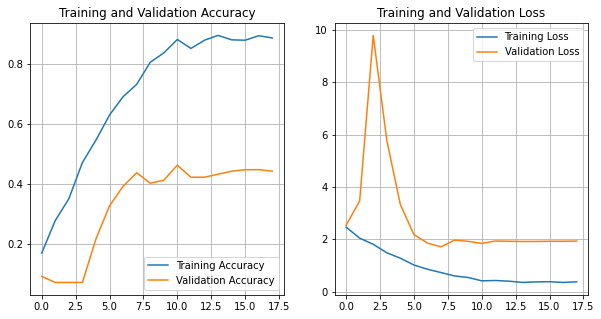

In [99]:
plot_hist(history)

In [45]:
def create_model():
    conv_base = EfficientNetB0(include_top = False, weights = "imagenet", drop_connect_rate=0.6,
                               input_shape = (TARGET_SIZE, TARGET_SIZE, 3))
    # Freeze pre-trained layers
    conv_base.trainable = False
    
    # Re-build top layers
    model = conv_base.output
    model = layers.GlobalAveragePooling2D()(model)
    model = layers.BatchNormalization()(model)
    
    dropout_rate=0.2
    model = layers.Dropout(dropout_rate, name="top_dropout")(model)
    model = layers.Dense(NUM_CLASSES, activation = "softmax")(model)
    model = models.Model(conv_base.input, model)

    model.compile(optimizer = Adam(lr = 0.01),
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"])
    return model

model = create_model()
model.summary()

16711680/16705208 [==============================] - 37s 2us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
__________________________

In [46]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30
100/100 - 101s - loss: 3.3868 - accuracy: 0.3925 - val_loss: 2.1020 - val_accuracy: 0.3417

Epoch 00001: val_loss did not improve from 1.41672
Epoch 2/30
100/100 - 69s - loss: 2.9872 - accuracy: 0.4525 - val_loss: 1.5049 - val_accuracy: 0.5276

Epoch 00002: val_loss did not improve from 1.41672
Epoch 3/30
100/100 - 69s - loss: 2.7251 - accuracy: 0.5050 - val_loss: 1.6844 - val_accuracy: 0.5377

Epoch 00003: val_loss did not improve from 1.41672
Epoch 4/30
100/100 - 69s - loss: 2.5811 - accuracy: 0.5387 - val_loss: 1.9637 - val_accuracy: 0.5829

Epoch 00004: val_loss did not improve from 1.41672

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
Epoch 5/30
100/100 - 69s - loss: 1.8820 - accuracy: 0.5925 - val_loss: 1.7749 - val_accuracy: 0.6181

Epoch 00005: val_loss did not improve from 1.41672
Epoch 6/30
100/100 - 70s - loss: 1.5774 - accuracy: 0.6187 - val_loss: 1.8775 - val_accuracy: 0.6080

Epoch 00006: val_loss did not improve from 1.41672


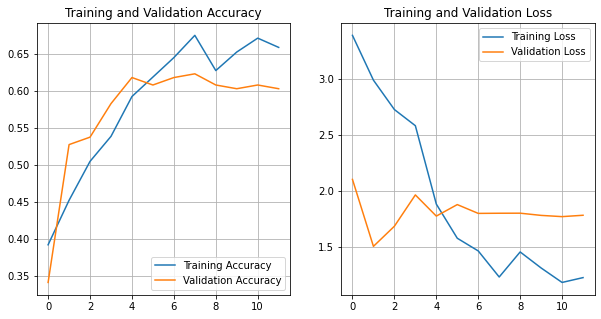

In [52]:
plot_hist(history)

In [48]:
weights_path = './first_finetune_weights.h5'
model.save_weights(weights_path)

In [49]:
cont_model = tf.keras.models.clone_model(model)
cont_model.load_weights(weights_path)

def unfreeze_whole_model(model):
    # We unfreeze the whole layers while leaving BatchNorm layers frozen
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", 
        metrics=["accuracy"]
    )


unfreeze_whole_model(cont_model)
cont_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
____________________________________________________________________________________________

In [53]:
epochs = 30  # @param {type: "slider", min:8, max:50}
history = cont_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30
100/100 - 245s - loss: 2.4299 - accuracy: 0.4900 - val_loss: 2.4729 - val_accuracy: 0.4673

Epoch 00001: val_loss did not improve from 1.41672
Epoch 2/30
100/100 - 211s - loss: 2.0645 - accuracy: 0.5675 - val_loss: 1.9600 - val_accuracy: 0.5126

Epoch 00002: val_loss did not improve from 1.41672
Epoch 3/30
100/100 - 239s - loss: 1.6350 - accuracy: 0.6037 - val_loss: 1.9018 - val_accuracy: 0.5176

Epoch 00003: val_loss did not improve from 1.41672
Epoch 4/30
100/100 - 233s - loss: 1.4850 - accuracy: 0.6263 - val_loss: 2.4239 - val_accuracy: 0.4925

Epoch 00004: val_loss did not improve from 1.41672
Epoch 5/30
100/100 - 229s - loss: 1.0711 - accuracy: 0.7050 - val_loss: 2.0965 - val_accuracy: 0.5729

Epoch 00005: val_loss did not improve from 1.41672

Epoch 00005: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 6/30
100/100 - 247s - loss: 0.9696 - accuracy: 0.7262 - val_loss: 1.4294 - val_accuracy: 0.6432

Epoch 00006: val_loss did not improve from 1.

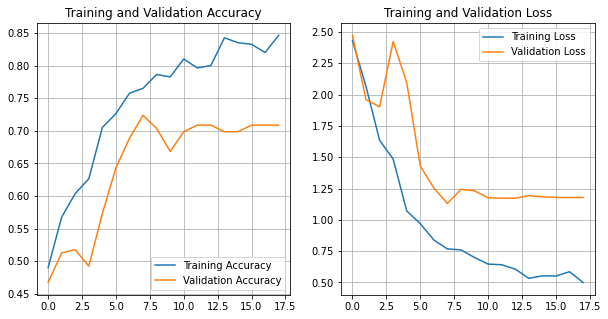

In [54]:
plot_hist(history)

In [101]:
cont_model.evaluate(val_ds)

25/25 [==============================] - 26s 695ms/step - loss: 1.1307 - accuracy: 0.7236


[1.1306968927383423, 0.7236180901527405]